In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/cleaned_data.csv')

In [3]:
df.head()

,HRHHID,HEFAMINC,HRNUMHOU,PRTAGE,PERET1,PEHRUSLT,PRNMCHLD,QSTNUM,HETSP3O,HESP6,...,food_pantry,has_dis,mul_jobs,service_status,is_hispanic,job_loss,type_job,pay_period,in_union,in_school
0,581125017600866,14,4,37,-1,60,2,1,-1,-1,...,Unknown,No,No,No,No,NaN,ForProf,NaN,No,NaN
1,581125017600866,14,4,35,-1,-1,2,1,-1,-1,...,Unknown,Yes,NaN,No,No,NaN,NaN,NaN,No,NaN
2,581125017600866,14,4,16,-1,-1,0,1,-1,-1,...,Unknown,No,NaN,No,No,NaN,NaN,NaN,No,HS
3,581125017600866,14,4,13,-1,-1,0,1,-1,-1,...,Unknown,No,NaN,No,No,NaN,NaN,NaN,No,NaN
4,809001585510960,13,3,28,-1,40,1,2,-1,-1,...,Unknown,No,No,No,No,NaN,ForProf,bi-week,No,College


In [4]:
df.drop('HRHHID', axis=1, inplace=True)

- Dropping anyone under the age of 16 because out of the 23, only one had a job and since we still have the household info, we already know if the household is food insecure or not.

In [5]:
df.drop(df[df['PRTAGE'] < 16].index, inplace = True)

In [6]:
df

,HEFAMINC,HRNUMHOU,PRTAGE,PERET1,PEHRUSLT,PRNMCHLD,QSTNUM,HETSP3O,HESP6,HESP7,...,food_pantry,has_dis,mul_jobs,service_status,is_hispanic,job_loss,type_job,pay_period,in_union,in_school
0,14,4,37,-1,60,2,1,-1,-1,-1,...,Unknown,No,No,No,No,NaN,ForProf,NaN,No,NaN
1,14,4,35,-1,-1,2,1,-1,-1,-1,...,Unknown,Yes,NaN,No,No,NaN,NaN,NaN,No,NaN
2,14,4,16,-1,-1,0,1,-1,-1,-1,...,Unknown,No,NaN,No,No,NaN,NaN,NaN,No,HS
4,13,3,28,-1,40,1,2,-1,-1,-1,...,Unknown,No,No,No,No,NaN,ForProf,bi-week,No,College
5,13,3,27,-1,40,1,2,-1,-1,-1,...,Unknown,No,No,No,No,NaN,Gov,month,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138936,12,5,29,-1,40,2,70268,-1,-1,-1,...,Unknown,No,No,No,No,NaN,ForProf,NaN,No,NaN
138954,11,2,55,-1,45,0,70284,-1,-1,-1,...,Unknown,No,No,No,No,NaN,ForProf,hour,No,NaN
138955,11,2,44,-1,-1,0,70284,-1,-1,-1,...,Unknown,No,NaN,No,No,NaN,NaN,NaN,No,NaN
138957,14,2,58,-1,48,0,70286,-1,-1,-1,...,Unknown,No,No,No,No,NaN,ForProf,NaN,No,NaN


In [7]:
df.drop_duplicates(subset='QSTNUM', inplace=True)

In [8]:
df.head(20)

,HEFAMINC,HRNUMHOU,PRTAGE,PERET1,PEHRUSLT,PRNMCHLD,QSTNUM,HETSP3O,HESP6,HESP7,...,food_pantry,has_dis,mul_jobs,service_status,is_hispanic,job_loss,type_job,pay_period,in_union,in_school
0,14,4,37,-1,60,2,1,-1,-1,-1,...,Unknown,No,No,No,No,NaN,ForProf,NaN,No,NaN
4,13,3,28,-1,40,1,2,-1,-1,-1,...,Unknown,No,No,No,No,NaN,ForProf,bi-week,No,College
9,7,3,22,-1,-1,1,5,-1,-1,-1,...,Yes,No,NaN,No,No,NaN,NaN,NaN,No,NaN
12,11,1,27,-1,40,0,6,-1,-1,-1,...,Yes,No,No,No,No,NaN,ForProf,NaN,No,NaN
13,15,6,49,-1,-4,0,7,-1,-1,-1,...,Yes,No,No,No,No,NaN,Self-emp,NaN,No,NaN
20,13,2,49,-1,40,0,9,-1,-1,-1,...,Unknown,No,No,No,Yes,NaN,Gov,NaN,No,NaN
22,6,2,72,2,-1,0,10,-1,-1,-1,...,Unknown,No,NaN,No,Yes,NaN,NaN,NaN,No,NaN
24,9,3,55,2,-1,0,11,-1,-1,-1,...,Unknown,No,NaN,No,No,NaN,NaN,NaN,No,NaN
27,10,2,32,-1,-4,0,12,-1,-1,-1,...,Unknown,No,No,No,No,NaN,ForProf,NaN,No,NaN
29,1,2,36,-1,-1,1,13,360,2,-1,...,No,No,NaN,No,No,NaN,NaN,NaN,No,College


In [9]:
print(f"The youngest person in this data set is {df['PRTAGE'].min()}")
print(f"The oldest person in this data set is {df['PRTAGE'].max()}")

The youngest person in this data set is 16
The oldest person in this data set is 85


In [10]:
df['job_loss'] = df['job_loss'].fillna('No')

- In the hours worked per week, -4 meant hours varied so I imputed with the median here by first replacing -4 with NaN to turn null then fillna with median. When using fillna for this one it didn't actually change it so I just did the replace method again after finding the median hours worked were 32

In [11]:
df['PEHRUSLT'].replace([-4], ['NaN'], inplace=True)

In [12]:
df['PEHRUSLT'].replace(['NaN'], [32], inplace=True)

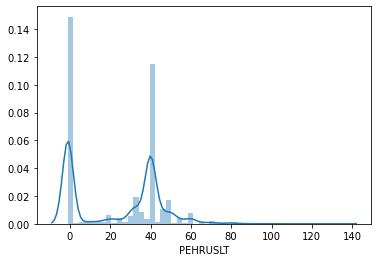

In [13]:
sns.distplot(df['PEHRUSLT']);

In [14]:
df.loc[df['PEHRUSLT'] == -1]

,HEFAMINC,HRNUMHOU,PRTAGE,PERET1,PEHRUSLT,PRNMCHLD,QSTNUM,HETSP3O,HESP6,HESP7,...,food_pantry,has_dis,mul_jobs,service_status,is_hispanic,job_loss,type_job,pay_period,in_union,in_school
9,7,3,22,-1,-1,1,5,-1,-1,-1,...,Yes,No,NaN,No,No,No,NaN,NaN,No,NaN
22,6,2,72,2,-1,0,10,-1,-1,-1,...,Unknown,No,NaN,No,Yes,No,NaN,NaN,No,NaN
24,9,3,55,2,-1,0,11,-1,-1,-1,...,Unknown,No,NaN,No,No,No,NaN,NaN,No,NaN
29,1,2,36,-1,-1,1,13,360,2,-1,...,No,No,NaN,No,No,No,NaN,NaN,No,College
32,4,1,61,-1,-1,0,15,-1,-1,-1,...,Unknown,Yes,NaN,No,No,No,NaN,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138584,6,1,69,-1,-1,0,69946,110,-1,-1,...,Yes,Yes,NaN,No,No,No,NaN,NaN,No,NaN
138690,11,2,49,-1,-1,0,70041,-1,-1,-1,...,Unknown,No,NaN,No,Yes,No,NaN,NaN,No,NaN
138692,15,1,79,2,-1,0,70042,-1,-1,-1,...,Yes,No,NaN,No,No,No,NaN,NaN,No,NaN
138704,9,2,78,2,-1,0,70054,-1,-1,-1,...,Yes,No,NaN,No,No,No,NaN,NaN,No,NaN


In [42]:
df.drop('pay_period', axis=1, inplace=True)

In [15]:
df['in_school'] = df['in_school'].fillna('No')

In [43]:
df.head()

,HEFAMINC,HRNUMHOU,PRTAGE,PERET1,PEHRUSLT,PRNMCHLD,QSTNUM,HETSP3O,HESP6,HESP7,...,marital_status,food_pantry,has_dis,mul_jobs,service_status,is_hispanic,job_loss,type_job,in_union,in_school
0,14,4,37,0,60,2,1,0,0,0,...,Yes,Unknown,No,No,No,No,No,ForProf,No,No
4,13,3,28,0,40,1,2,0,0,0,...,Yes,Unknown,No,No,No,No,No,ForProf,No,College
9,7,3,22,0,0,1,5,0,0,0,...,Yes,Yes,No,0,No,No,No,NaN,No,No
12,11,1,27,0,40,0,6,0,0,0,...,No,Yes,No,No,No,No,No,ForProf,No,No
13,15,6,49,0,32,0,7,0,0,0,...,Yes,Yes,No,No,No,No,No,Self-emp,No,No


In [17]:
df.loc[df['type_job'].isnull()]

,HEFAMINC,HRNUMHOU,PRTAGE,PERET1,PEHRUSLT,PRNMCHLD,QSTNUM,HETSP3O,HESP6,HESP7,...,food_pantry,has_dis,mul_jobs,service_status,is_hispanic,job_loss,type_job,pay_period,in_union,in_school
9,7,3,22,-1,-1,1,5,-1,-1,-1,...,Yes,No,NaN,No,No,No,NaN,NaN,No,No
22,6,2,72,2,-1,0,10,-1,-1,-1,...,Unknown,No,NaN,No,Yes,No,NaN,NaN,No,No
24,9,3,55,2,-1,0,11,-1,-1,-1,...,Unknown,No,NaN,No,No,No,NaN,NaN,No,No
29,1,2,36,-1,-1,1,13,360,2,-1,...,No,No,NaN,No,No,No,NaN,NaN,No,College
32,4,1,61,-1,-1,0,15,-1,-1,-1,...,Unknown,Yes,NaN,No,No,No,NaN,NaN,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138584,6,1,69,-1,-1,0,69946,110,-1,-1,...,Yes,Yes,NaN,No,No,No,NaN,NaN,No,No
138690,11,2,49,-1,-1,0,70041,-1,-1,-1,...,Unknown,No,NaN,No,Yes,No,NaN,NaN,No,No
138692,15,1,79,2,-1,0,70042,-1,-1,-1,...,Yes,No,NaN,No,No,No,NaN,NaN,No,No
138704,9,2,78,2,-1,0,70054,-1,-1,-1,...,Yes,No,NaN,No,No,No,NaN,NaN,No,No


In [18]:
df.columns

Index(['HEFAMINC', 'HRNUMHOU', 'PRTAGE', 'PERET1', 'PEHRUSLT', 'PRNMCHLD',
       'QSTNUM', 'HETSP3O', 'HESP6', 'HESP7', 'HESP7A', 'HESP8', 'HESS1',
       'HESH4', 'HESC1', 'HESC2', 'HESC3', 'food_secure', 'state', 'is_metro',
       'region', 'division', 'sex', 'education', 'race', 'marital_status',
       'food_pantry', 'has_dis', 'mul_jobs', 'service_status', 'is_hispanic',
       'job_loss', 'type_job', 'pay_period', 'in_union', 'in_school'],
      dtype='object')

In [45]:
df['mul_jobs'] = df['mul_jobs'].fillna(0)

In [49]:
df['mul_jobs'].replace(['Yes', 'No'], [2, 1], inplace=True)

In [50]:
df['type_job'] = df['type_job'].fillna(0)
df.head()

,HEFAMINC,HRNUMHOU,PRTAGE,PERET1,PEHRUSLT,PRNMCHLD,QSTNUM,HETSP3O,HESP6,HESP7,...,marital_status,food_pantry,has_dis,mul_jobs,service_status,is_hispanic,job_loss,type_job,in_union,in_school
0,14,4,37,0,60,2,1,0,0,0,...,Yes,Unknown,No,1,No,No,No,ForProf,No,No
4,13,3,28,0,40,1,2,0,0,0,...,Yes,Unknown,No,1,No,No,No,ForProf,No,College
9,7,3,22,0,0,1,5,0,0,0,...,Yes,Yes,No,0,No,No,No,0,No,No
12,11,1,27,0,40,0,6,0,0,0,...,No,Yes,No,1,No,No,No,ForProf,No,No
13,15,6,49,0,32,0,7,0,0,0,...,Yes,Yes,No,1,No,No,No,Self-emp,No,No


In [20]:
df['HETSP3O'].replace([-1], [0], inplace=True)

In [21]:
df.replace([-1], [0], inplace=True)

In [22]:
df['food_secure'].value_counts()

0    40142
1     9117
Name: food_secure, dtype: int64

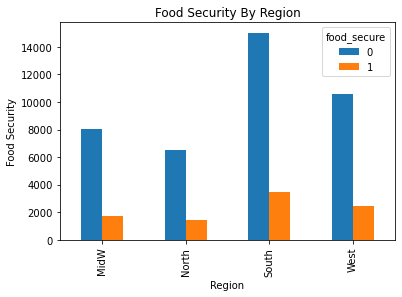

In [23]:
pd.crosstab(df.region,df.food_secure).plot(kind='bar')

plt.xlabel('Region')
plt.ylabel('Food Security')
plt.title('Food Security By Region');

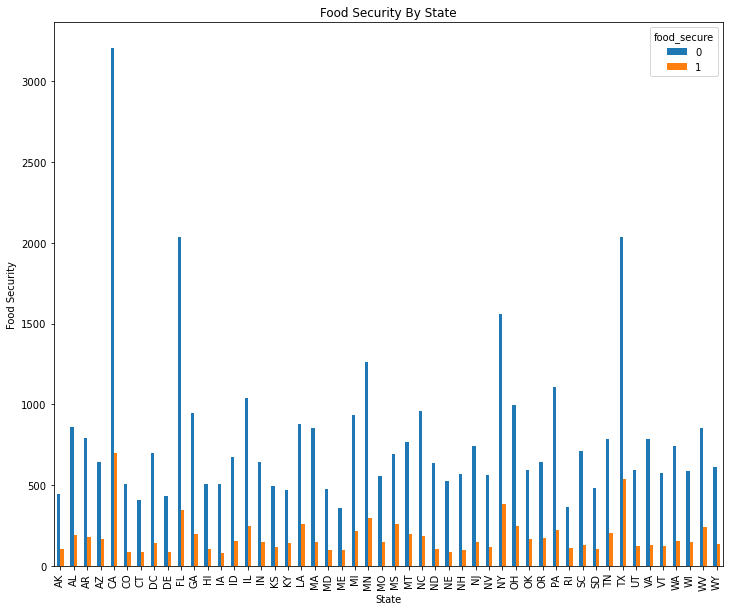

In [24]:
pd.crosstab(df.state,df.food_secure).plot(kind='bar', figsize=(12,10))

plt.xlabel('State')
plt.ylabel('Food Security')
plt.title('Food Security By State');

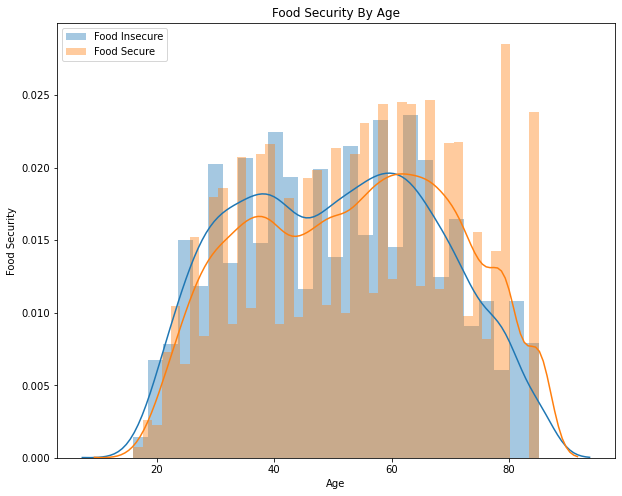

In [25]:
plt.figure(figsize=(10,8))

sns.distplot(df[df['food_secure'] == 1]['PRTAGE']);
sns.distplot(df[df['food_secure'] == 0]['PRTAGE']);

plt.xlabel('Age')
plt.ylabel('Food Security')
plt.title('Food Security By Age')
plt.legend(('Food Insecure', 'Food Secure'));

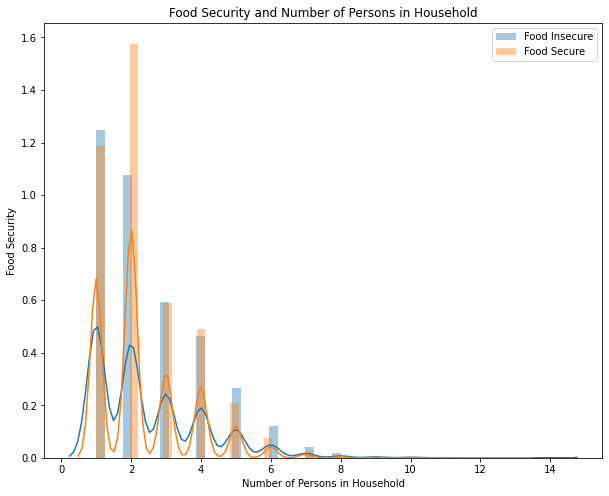

In [66]:
plt.figure(figsize=(10,8))

sns.distplot(df[df['food_secure'] == 1]['HRNUMHOU']);
sns.distplot(df[df['food_secure'] == 0]['HRNUMHOU']);

plt.xlabel('Number of Persons in Household')
plt.ylabel('Food Security')
plt.title('Food Security and Number of Persons in Household')
plt.legend(('Food Insecure', 'Food Secure'));

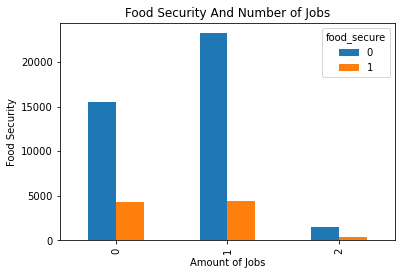

In [53]:
pd.crosstab(df.mul_jobs,df.food_secure).plot(kind='bar')

plt.xlabel('Amount of Jobs')
plt.ylabel('Food Security')
plt.title('Food Security And Number of Jobs');

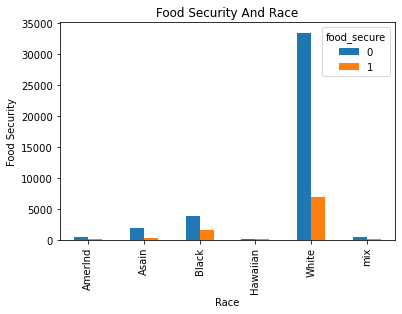

In [65]:
pd.crosstab(df.race,df.food_secure).plot(kind='bar')

plt.xlabel('Race')
plt.ylabel('Food Security')
plt.title('Food Security And Race');

In [69]:
df['HEFAMINC'].value_counts()

150000    12564
100000     6033
75000      4887
60000      4005
50000      3974
35000      2885
40000      2658
25000      2549
30000      2402
20000      1921
12500      1374
15000      1258
5000       1194
10000       979
7500        576
Name: HEFAMINC, dtype: int64

In [68]:
df['HEFAMINC'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], [5000,7500,10000,12500,15000,20000,25000,30000,35000,40000,50000,60000,75000,100000,150000,150000], inplace=True)

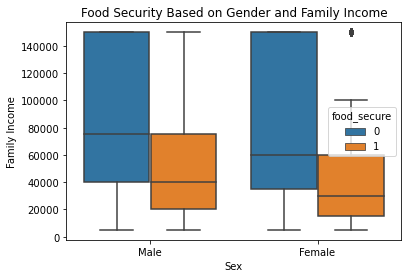

In [92]:
sns.boxplot(x=df['sex'], y=df['HEFAMINC'], hue=df['food_secure'])

plt.xlabel('Sex')
plt.ylabel('Family Income')
plt.title('Food Security Based on Gender and Family Income');

In [88]:
outliers = df.loc[(df['sex'] == 'Female') & (df['HEFAMINC'] == 150000) & (df['food_secure'] == 1) & (df['type_job'] == 0)]

In [91]:
df.drop(outliers.index, inplace=True)

In [95]:
df.shape

(49173, 35)